In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import proplot as pplt
from matplotlib_scalebar.scalebar import ScaleBar
from skimage.restoration import unwrap_phase

from itertools import product

## inside the scan region

In [15]:
import glob

amps = dict()
prob_max = dict()
for i in glob.glob('*/final_trans*.npy'):
    if i.count('padding_1'):
        padding = 1
    else:
        padding = 2

    if i.count('ePIE'):
        alg = 'GEM ePIE'
    elif i.count('PtyPy_EPIE'):
        alg = 'PtyPy EPIE'
    else:
        alg = 'PtyPy DM'

    amps['{} {}'.format(alg, padding)] = np.abs(np.load(i))
    prob_max['{} {}'.format(alg, padding)] = np.sqrt(np.max(np.abs(np.load(i.replace('trans', 'probe')))**2))

In [21]:
prob_orig = np.sqrt(np.max(np.abs(np.load('../probe_wf.npy'))**2))

In [22]:
prob_max

{'GEM ePIE 1': 0.11595295,
 'GEM ePIE 2': 0.027927157,
 'PtyPy DM 1': 14.09703,
 'PtyPy DM 2': 7.061494,
 'PtyPy EPIE 1': 17.241146,
 'PtyPy EPIE 2': 250.69424}

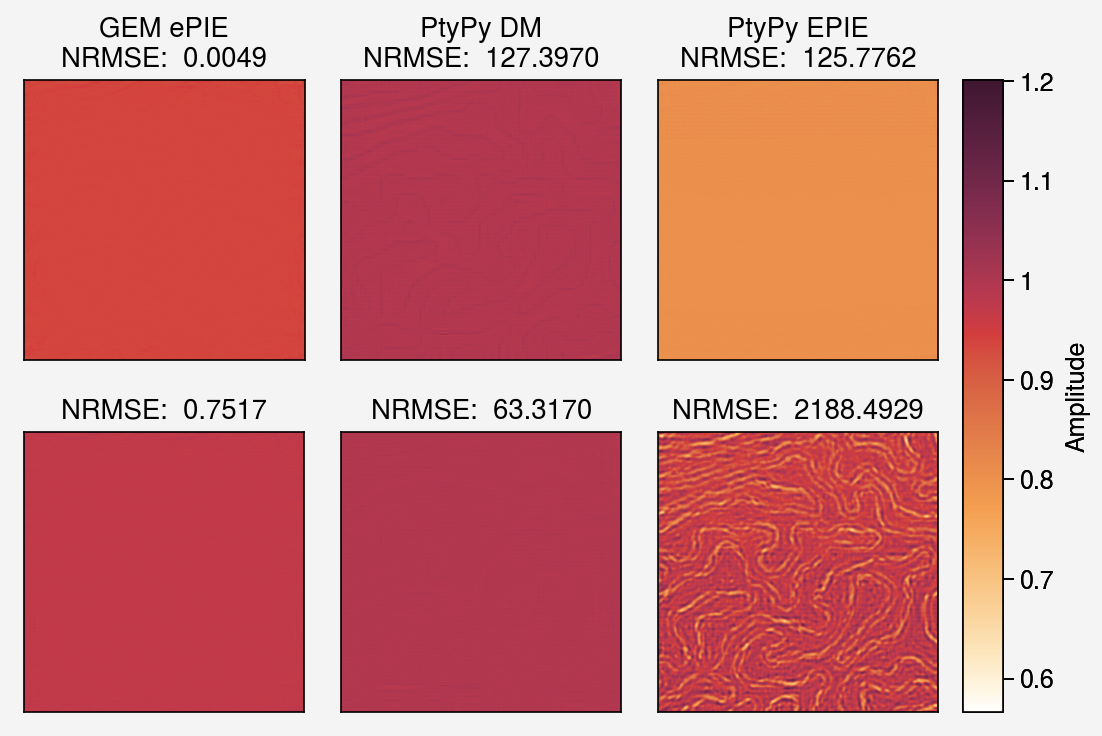

In [25]:
fig, axs = pplt.subplots(
    nrows=2, ncols=3, figwidth="14cm", sharex=False,
    xticks=[], yticks=[])

vmin = min([np.min(i) for i in amps.values()])
vmax = max([np.max(i) for i in amps.values()])
counter = 0
for ax, amp in zip(list(axs), product([1, 2], ['GEM ePIE', 'PtyPy DM', 'PtyPy EPIE'])):
    img = amps['{} {}'.format(*reversed(amp))]
    m = ax.imshow(img, vmin=vmin, vmax=vmax)
    if counter > 2:
        ax.format(title=f"NRMSE: {np.mean(np.abs(img*prob_max['{} {}'.format(*reversed(amp))]/prob_orig - 1)): .4f}")
    else:
        ax.format(title=f"{amp[1]}\nNRMSE: {np.mean(np.abs(img*prob_max['{} {}'.format(*reversed(amp))]/prob_orig - 1)): .4f}")
    counter += 1
fig.colorbar(m, loc='r', label='Amplitude')

fig.savefig('AmplitudeAnalysis.pdf')

In [32]:
vmin = min([np.min(i) for i in amps.values()])
vmax = max([np.max(i) for i in amps.values()])
vmin, vmax

(0.5660003, 1.2005566)

In [34]:
cycle

[[1, 2], [1, 2], [1, 2]]